# Spotify Bop Index Predictor
Built during Ctrl+Shift+Intelligence in COPS Week 2024.
<!-- Welcome to Ctrl+Shift+Intelligene 2024. This competition aims to predict the 'Bop Index' of various songs on Spotify! The Bop Index is a feature that is determined by a number of factors, such as the theme of the song and its commercial viability. Your objective is to train a model that is capable of accurately predicting the Bop Index, using the training data provided to you.

Dataset Description
Files

train.csv - the training set
test.csv - the test set(on which predictions must be made)
** Note that the Bop Index is labeled as 'target' in the training dataset. It is the target variable for the model.
Dataset Description

Metadata

track_id: Unique identifier for each track
track_name: Name of the track
track_artist: Artist(s) of the track
track_album_id: Unique identifier for the album
track_album_name: Name of the album
track_album_release_date: Release date of the album
playlist_name: Name of the playlist the track belongs to
playlist_id: Unique identifier for the playlist
playlist_genre: Genre of the playlist
playlist_subgenre: Subgenre of the playlist
track_language: Language of the lyrics
Lyrics

lyrics: Lyrics of the track
Audio Features

dance_factor: Measure of how suitable a track is for dancing
track_energy: Measure of intensity and activity
track_key: Key of the track
track_loudness: Loudness of the track
track_mode: Modality of the track
speech_factor: Measure of the presence of spoken words
track_acousticness: Measure of acousticness
track_instrumentalness: Measure of instrumentalness
track_liveness: Measure of liveness
track_valence: Measure of musical positiveness
track_tempo: Tempo of the track
duration_track_ms: Duration of the track in milliseconds -->

In [59]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from xgboost import XGBRegressor, XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC
from category_encoders import BaseNEncoder

TRAINING_DATA = 'data/train.csv'
TEST_DATA = 'data/test.csv'

In [45]:
# Load the data
train_data = pd.read_csv(TRAINING_DATA)
test_data = pd.read_csv(TEST_DATA)

In [46]:
# Data Exploration
print(train_data.shape)
train_data.info()
train_data.describe().round(2)

(6000, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                6000 non-null   int64  
 1   track_id                  6000 non-null   object 
 2   track_name                6000 non-null   object 
 3   track_artist              6000 non-null   object 
 4   lyrics                    6000 non-null   object 
 5   track_album_id            6000 non-null   object 
 6   track_album_name          6000 non-null   object 
 7   track_album_release_date  6000 non-null   object 
 8   playlist_name             6000 non-null   object 
 9   playlist_id               6000 non-null   object 
 10  playlist_genre            6000 non-null   object 
 11  playlist_subgenre         6000 non-null   object 
 12  dance_factor              6000 non-null   float64
 13  track_energy              6000 non-null   float64
 1

,Unnamed: 0,dance_factor,track_energy,track_key,track_loudness,track_mode,speech_factor,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,duration_track_ms,target
count,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00,6000.00
mean,2999.50,0.63,0.69,5.35,-6.86,0.59,0.10,0.17,0.04,0.19,0.51,120.97,232756.93,33.67
std,1732.20,0.15,0.18,3.62,2.93,0.49,0.10,0.22,0.15,0.15,0.23,26.98,57774.45,27.58
min,0.00,0.15,0.05,0.00,-26.28,0.00,0.02,0.00,0.00,0.02,0.03,50.45,37640.00,0.00
25%,1499.75,0.53,0.56,2.00,-8.40,0.00,0.04,0.01,0.00,0.09,0.34,100.00,195412.00,0.00
50%,2999.50,0.65,0.71,6.00,-6.33,1.00,0.06,0.07,0.00,0.13,0.51,120.06,223771.00,38.00
75%,4499.25,0.74,0.84,9.00,-4.76,1.00,0.12,0.23,0.00,0.25,0.69,135.67,261573.00,58.00
max,5999.00,0.98,1.00,11.00,0.55,1.00,0.62,0.99,0.97,1.00,0.99,208.57,516893.00,100.00


In [47]:
train_data.drop(['Unnamed: 0', 'track_album_id', 'playlist_id', 'track_language'], axis=1, inplace=True)
train_data.head()

,track_id,track_name,track_artist,lyrics,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,dance_factor,...,track_loudness,track_mode,speech_factor,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,duration_track_ms,target
0,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",Love & Loss,2017-11-21,Hard Rock Workout,rock,hard rock,0.303,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,28
1,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",r&b,new jack swing,0.845,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,0
2,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,CeeLo's Magic Moment,2012-10-29,Christmas Soul,r&b,neo soul,0.425,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,0
3,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,pop,dance pop,0.760,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,65
4,00f9VGHfQhAHMCQ2bSjg3D,Soldier,James TW,"Hold your breath, don't look down, keep trying...",Chapters,2019-04-26,urban contemporary,r&b,urban contemporary,0.496,...,-6.157,1,0.0550,0.28000,0.00000,0.0975,0.305,147.764,224720,70


In [48]:
# Are there any missing values?
train_data.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
lyrics                      0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_genre              0
playlist_subgenre           0
dance_factor                0
track_energy                0
track_key                   0
track_loudness              0
track_mode                  0
speech_factor               0
track_acousticness          0
track_instrumentalness      0
track_liveness              0
track_valence               0
track_tempo                 0
duration_track_ms           0
target                      0
dtype: int64

In [49]:
# Are there any duplicates?
train_data.duplicated().sum()

0

In [50]:
# Number of unique values in each column
train_data.nunique()

track_id                    6000
track_name                  5431
track_artist                2788
lyrics                      5622
track_album_name            4815
track_album_release_date    2126
playlist_name                374
playlist_genre                 6
playlist_subgenre             24
dance_factor                 732
track_energy                 789
track_key                     12
track_loudness              4439
track_mode                     2
speech_factor               1100
track_acousticness          2408
track_instrumentalness      2403
track_liveness              1179
track_valence                992
track_tempo                 5249
duration_track_ms           5240
target                        96
dtype: int64

What we know till now:
- There are 2 datasets, train and test.
- The train dataset has 6000 rows and 16 columns, including the target column.
- The test dataset has 2000 rows and 15 columns.
- Only one language is present in the dataset, ie en (English).
- There are no null values or completely duplicate rows in the dataset.

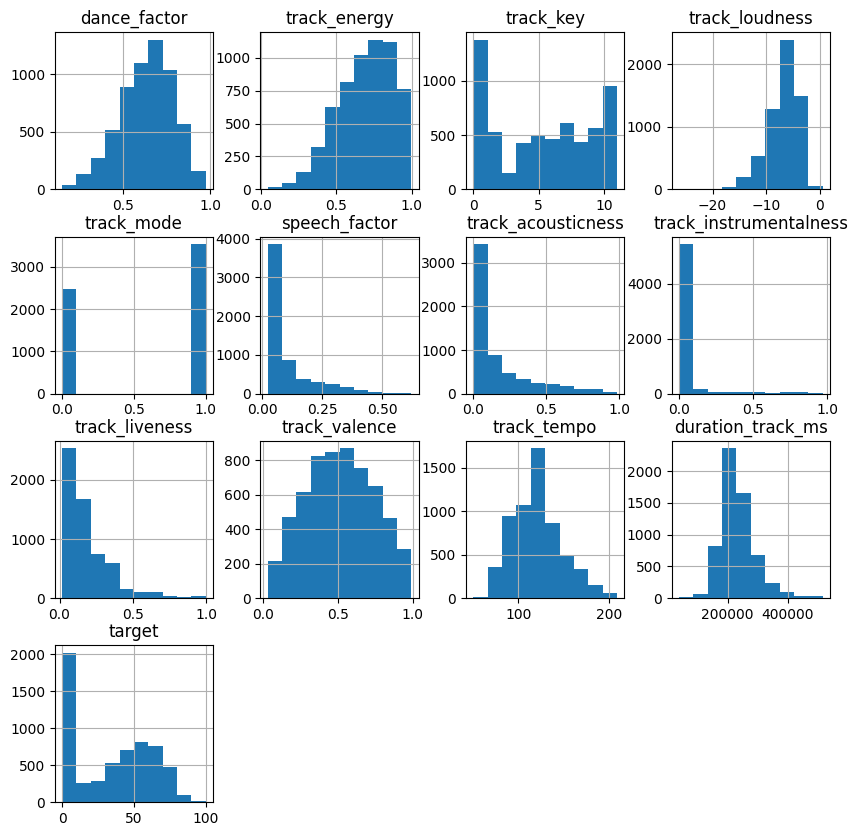

In [51]:
# Graphs
train_data.hist(figsize=(10, 10))
plt.show()

<Figure size 100x100 with 0 Axes>

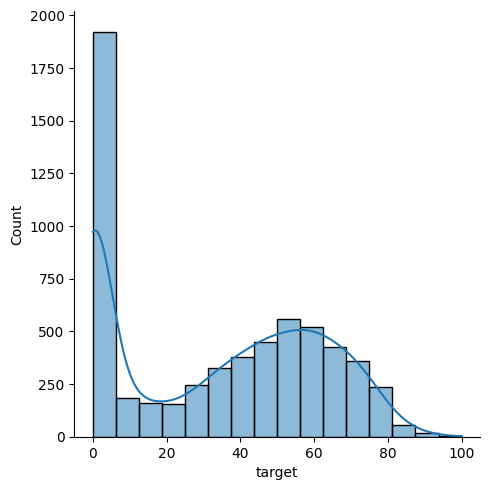

In [52]:
plt.figure(figsize=(1, 1))
# Target distribution
sns.displot(train_data['target'], kde=True)
plt.show()

In [53]:
train_data.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'dance_factor', 'track_energy', 'track_key',
       'track_loudness', 'track_mode', 'speech_factor', 'track_acousticness',
       'track_instrumentalness', 'track_liveness', 'track_valence',
       'track_tempo', 'duration_track_ms', 'target'],
      dtype='object')

In [162]:
audio_features = [
    "dance_factor",
    "track_energy",
    "track_key",
    "track_loudness",
    "track_mode",
    "speech_factor",
    "track_acousticness",
    "track_instrumentalness",
    "track_liveness",
    "track_valence",
    "track_tempo",
    "duration_track_ms",
]

encoder = OneHotEncoder()
oencoder = OrdinalEncoder(unknown_value=-1, handle_unknown="use_encoded_value")
scaler = MinMaxScaler()

def process_data(data, test_size):
    Y = data[['target']]
    X = data[audio_features]

    #  Encode categorical features
    encoded = encoder.fit_transform(data[["playlist_genre", "playlist_subgenre"]]).toarray()
    encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
    X = pd.concat([X, pd.DataFrame(encoded)], axis=1)


    # encoded = oencoder.fit_transform(data[["track_artist"]])
    # X = pd.concat([X, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)

    # Standardize the date
    # Format can be YYYY-MM-DD or just YYYY
    # Extract first 4 characters
    released = data['track_album_release_date'].str[:4]
    X['track_release_year'] = released

    # Standardize the data
    # scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    X = pd.DataFrame(scaled, columns=X.columns)

    # smote = SMOTE(random_state=24, k_neighbors=3)
    # X, Y = smote.fit_resample(X, Y)

    # Split the data
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=test_size, random_state=24)

    # Random oversampling
    ros = RandomOverSampler(random_state=42, sampling_strategy="minority")
    X_train, Y_train = ros.fit_resample(X_train, Y_train)

    return X_train, X_valid, Y_train, Y_valid

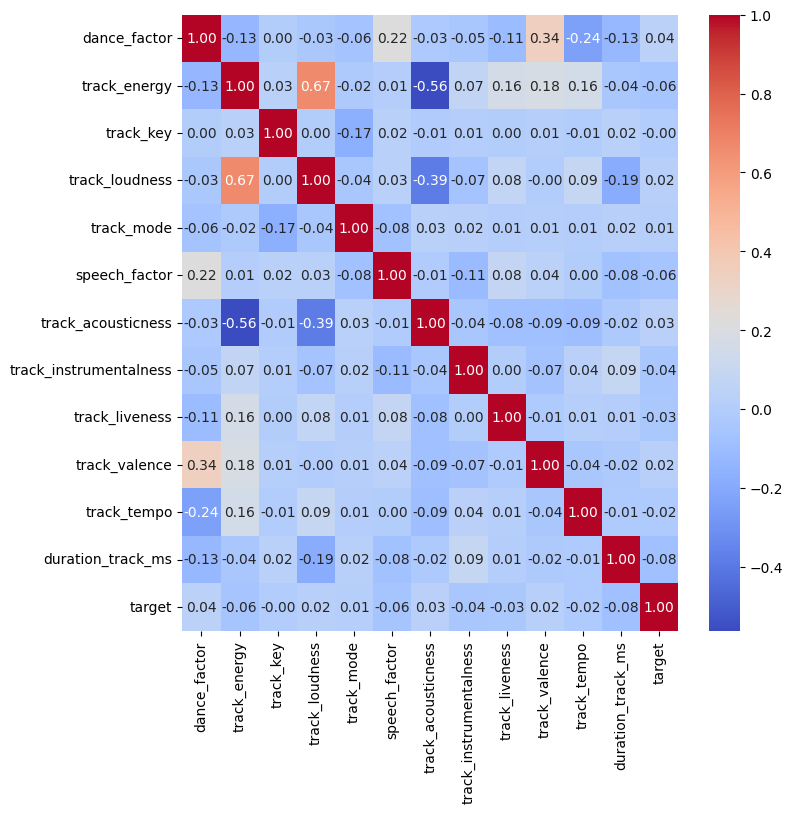

In [89]:
# Correlation matrix
corr_data = train_data[audio_features + ['target']]
corr_data = corr_data
correlation_matrix = corr_data.corr()

# Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [166]:
# Flop Predictor
def has_flopped(data):
    return (data['target'] == 0).astype(int)
train_data['flop'] = has_flopped(train_data)

Y = train_data[['flop']]
X = train_data[audio_features]

#  Encode categorical features
encoder = OneHotEncoder()
encoded = encoder.fit_transform(train_data[["playlist_genre", "playlist_subgenre"]]).toarray()
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
X = pd.concat([X, pd.DataFrame(encoded)], axis=1)

# # Encode Artist Name
# oencoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# encoded = oencoder.fit_transform(train_data[["track_artist"]])
# X = pd.concat([X, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)

# Standardize the date
# Format can be YYYY-MM-DD or just YYYY
# Extract first 4 characters
released = train_data['track_album_release_date'].str[:4]
X['track_release_year'] = released


# Standardize the data
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=X.columns)

# Split the data
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=24)

# Random oversampling
ros = RandomOverSampler(random_state=24, sampling_strategy="minority")
X_train, Y_train = ros.fit_resample(X_train, Y_train)

# for model_name, flopmodel in classification_models.items():
#     flopmodel.fit(X_train, Y_train.values.ravel())
#     predictions = flopmodel.predict(X_valid)
#     # Percent of incorrect predictions
#     print(f"{model_name} percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")

#     output = pd.DataFrame()
#     output["predicted"] = flopmodel.predict(X_train)
#     output["actual"] = Y_train.values

#     output.to_csv(f"output/{model_name}-flop-train.csv", index=False)

flopmodel = RandomForestClassifier(random_state=42, n_estimators=100)
flopmodel.fit(X_train, Y_train.values.ravel())
predictions = flopmodel.predict(X_valid)
# Percent of incorrect predictions
print(f"Random Forest percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")
print(f"Random Forest percent of false positives: {sum((predictions == 1) & (Y_valid.values.ravel() == 0)) / len(predictions)}")
print(f"Random Forest percent of false negatives: {sum((predictions == 0) & (Y_valid.values.ravel() == 1)) / len(predictions)}")

# returns 1 if the song is a flop, 0 otherwise
def is_flop(data):
    predictions = flopmodel.predict(data)
    return predictions

Random Forest percent of correct predictions: 0.7458333333333333
Random Forest percent of false positives: 0.043333333333333335
Random Forest percent of false negatives: 0.21083333333333334


In [105]:
models = {
    # "Logistic Regression": LogisticRegression(random_state=42),
    # "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    # "Support Vector Machine": SVR(),
    # "K-Nearest Neighbors": KNeighborsRegressor(),
    # "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "XGBoost": XGBRegressor(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.3,
                      subsample = 0.8,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=1,
                      random_state=42),
    # "Bayesian Ridge": BayesianRidge(),
}

(6075, 43) (1200, 43) (6075, 1) (1200, 1)
(6075, 43) (1200, 43) (6075, 1) (1200, 1)
Random Forest mean squared error: 680.97
XGBoost mean squared error: 678.83


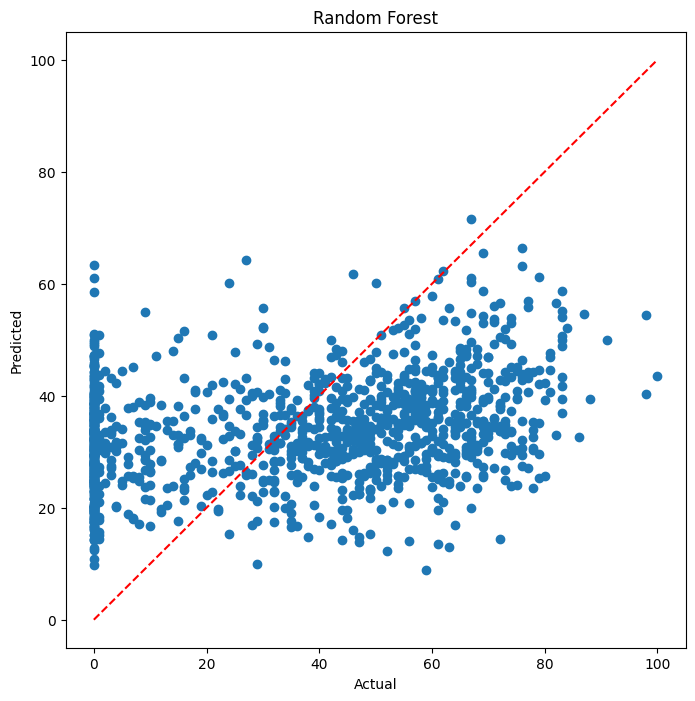

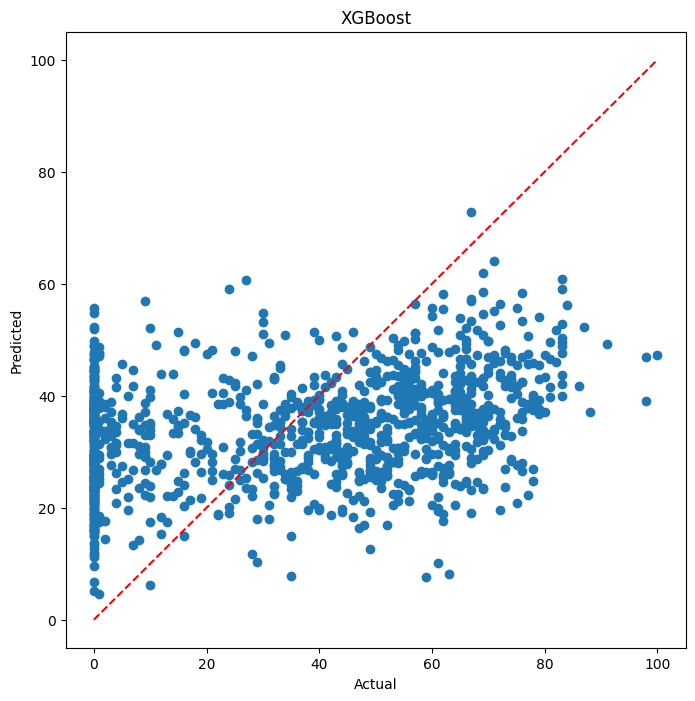

In [169]:
# make output directory
import os
if not os.path.exists("output"):
    os.makedirs("output")

X_train, X_valid, Y_train, Y_valid = process_data(train_data, 0.2)
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)


print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)
for model_name, model in models.items():
    plt.figure(figsize=(8, 8))
    model.fit(X_train, Y_train.values.ravel())
    predictions = model.predict(X_valid)
    # if is_flop(X_valid) == 1, then the song is a flop, then the prediction is 0, else the prediction is the model's prediction
    # predictions = predictions * (1 - is_flop(X_valid))
    print(f"{model_name} mean squared error: {mean_squared_error(Y_valid, predictions):.2f}")

    # Plot the predictions, with a line showing where the actual values would be
    plt.plot([0, 100], [0, 100], ls="--", c="red")
    plt.scatter(Y_valid, predictions)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(model_name)

    output = pd.DataFrame()
    output["predicted"] = model.predict(X_train)
    output["actual"] = Y_train.values

    output.to_csv(f"output/{model_name}-train.csv", index=False)

    output_test = pd.DataFrame(columns=["ID", "target"])

    # Test the model
    X_test = test_data[audio_features]

    #  Encode categorical features
    encoded = encoder.transform(test_data[["playlist_genre", "playlist_subgenre"]]).toarray()
    encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
    X_test = pd.concat([X_test, pd.DataFrame(encoded)], axis=1)

    # # Encode Artist Name
    # encoded = oencoder.transform(test_data[["track_artist"]])
    # X_test = pd.concat([X_test, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)

    # Standardize the date
    # Format can be YYYY-MM-DD or just YYYY
    # Extract first 4 characters
    released = test_data['track_album_release_date'].str[:4]
    X_test['track_release_year'] = released

    # Standardize the data
    # scaler = StandardScaler()
    scaled = scaler.fit_transform(X_test)
    X_test = pd.DataFrame(scaled, columns=X_test.columns)

    output_test["ID"] = test_data["Unnamed: 0"]
    test_predictions = model.predict(X_test)
    # test_predictions = test_predictions * (1 - is_flop(X_test))
    output_test["target"] = test_predictions
    output_test.to_csv(f"output/{model_name}-test.csv", index=False)

# for model_name, model in models.items():
#     plt.figure(figsize=(8, 8))
#     model.fit(X_train, Y_train.values.ravel())
#     predictions = model.predict(X_valid)
#     flop_predictions = is_flop(X_valid)
#     # if flop_predictions == 1, then the song is a flop, then the prediction is 0, else the prediction is the model's prediction
#     print(f"{model_name} mean squared error: {mean_squared_error(Y_valid, predictions):.2f}")



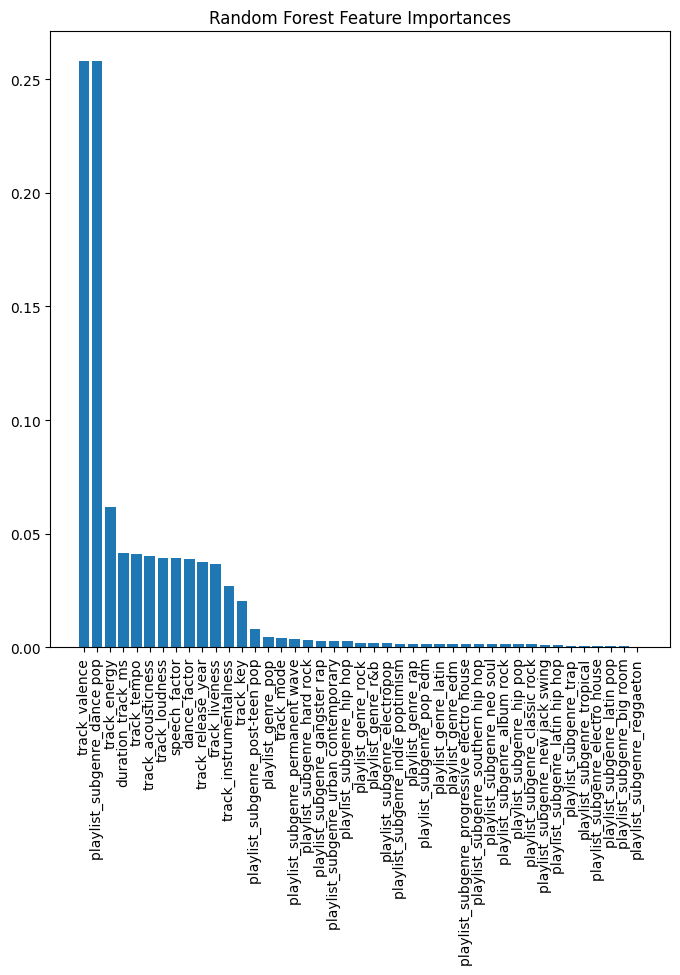

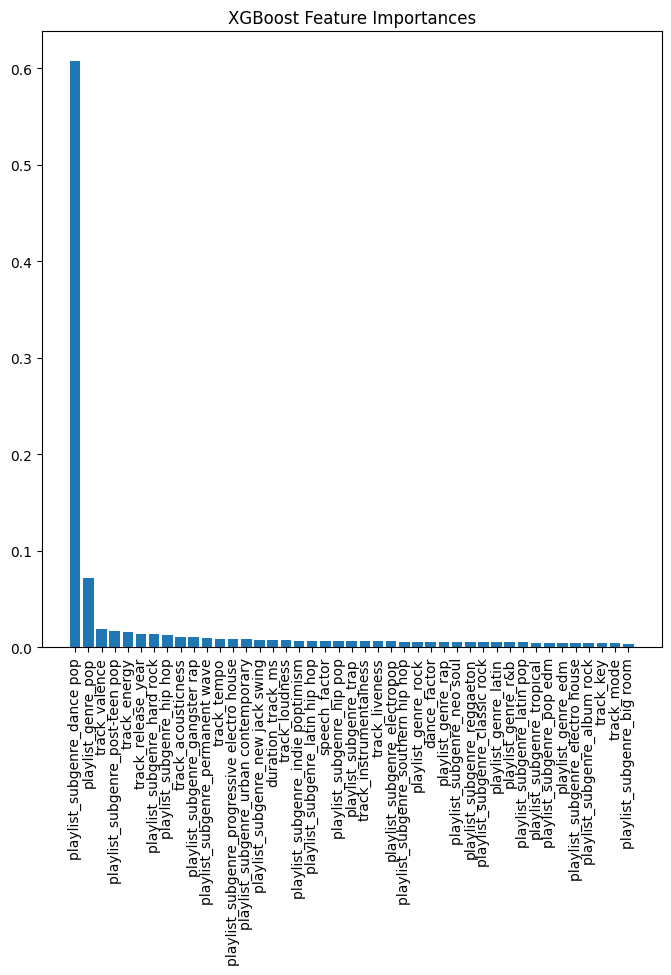

In [165]:
# Feature Importances

for model_name, model in models.items():
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]

    plt.figure(figsize=(8, 8))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
    plt.show()

In [ ]:
classification_models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=42),
}

# Flopped Approach

In [ ]:
# # Flop Predictor
# def has_flopped(data):
#     return (data['target'] == 0).astype(int)
# train_data['flop'] = has_flopped(train_data)

# Y = train_data[['flop']]
# X = train_data[audio_features]

# #  Encode categorical features
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(train_data[["playlist_genre", "playlist_subgenre"]]).toarray()
# encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
# X = pd.concat([X, pd.DataFrame(encoded)], axis=1)

# # Encode Artist Name
# oencoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# encoded = oencoder.fit_transform(train_data[["track_artist"]])
# X = pd.concat([X, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)


# # Standardize the data
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(X)
# X = pd.DataFrame(scaled, columns=X.columns)

# # Split the data
# X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=24)

# # for model_name, flopmodel in classification_models.items():
# #     flopmodel.fit(X_train, Y_train.values.ravel())
# #     predictions = flopmodel.predict(X_valid)
# #     # Percent of incorrect predictions
# #     print(f"{model_name} percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")

# #     output = pd.DataFrame()
# #     output["predicted"] = flopmodel.predict(X_train)
# #     output["actual"] = Y_train.values

# #     output.to_csv(f"output/{model_name}-flop-train.csv", index=False)

# flopmodel = RandomForestClassifier(random_state=42, n_estimat# Flop Predictor
# def has_flopped(data):
#     return (data['target'] == 0).astype(int)
# train_data['flop'] = has_flopped(train_data)

# Y = train_data[['flop']]
# X = train_data[audio_features]

# #  Encode categorical features
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(train_data[["playlist_genre", "playlist_subgenre"]]).toarray()
# encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
# X = pd.concat([X, pd.DataFrame(encoded)], axis=1)

# # Encode Artist Name
# oencoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# encoded = oencoder.fit_transform(train_data[["track_artist"]])
# X = pd.concat([X, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)


# # Standardize the data
# # scaler = StandardScaler()
# scaler = MinMaxScaler()
# scaled = scaler.fit_transform(X)
# X = pd.DataFrame(scaled, columns=X.columns)

# # Split the data
# X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=24)

# # for model_name, flopmodel in classification_models.items():
# #     flopmodel.fit(X_train, Y_train.values.ravel())
# #     predictions = flopmodel.predict(X_valid)
# #     # Percent of incorrect predictions
# #     print(f"{model_name} percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")

# #     output = pd.DataFrame()
# #     output["predicted"] = flopmodel.predict(X_train)
# #     output["actual"] = Y_train.values

# #     output.to_csv(f"output/{model_name}-flop-train.csv", index=False)

# flopmodel = RandomForestClassifier(random_state=42, n_estimators=100)
# flopmodel.fit(X_train, Y_train.values.ravel())
# predictions = flopmodel.predict(X_valid)
# # Percent of incorrect predictions
# print(f"Random Forest percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")
# ors=100)
# flopmodel.fit(X_train, Y_train.values.ravel())
# predictions = flopmodel.predict(X_valid)
# # Percent of incorrect predictions
# print(f"Random Forest percent of correct predictions: {sum(predictions == Y_valid.values.ravel()) / len(predictions)}")


In [ ]:
# # Predict if the song has flopped, and pass it to the regression model
# X_train, X_valid, Y_train, Y_valid = process_data(train_data, 0.1)

# X_train['flop'] = flopmodel.predict(X_train)
# X_valid['flop'] = flopmodel.predict(X_valid)

# print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)
# print(X_train.columns)

# for model_name, model in models.items():
#     model.fit(X_train, Y_train.values.ravel())
#     predictions = model.predict(X_valid)
#     # if predictions are negative, set them to 0
#     predictions = [max(0, x) for x in predictions]
#     print(f"{model_name} mean squared error: {mean_squared_error(Y_valid, predictions):.2f}")

#     output = pd.DataFrame()
#     output["predicted"] = model.predict(X_train)
#     output["actual"] = Y_train.values

#     output.to_csv(f"output/{model_name}-train.csv", index=False)

#     output_test = pd.DataFrame(columns=["ID", "target"])

#     # Test the model
#     X_test = test_data[audio_features]
#     encoded = encoder.transform(test_data[["playlist_genre", "playlist_subgenre"]]).toarray()
#     encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["playlist_genre", "playlist_subgenre"]))
#     X_test = pd.concat([X_test, pd.DataFrame(encoded)], axis=1)

#     # Encode Artist Name
#     encoded = oencoder.transform(test_data[["track_artist"]])
#     X_test = pd.concat([X_test, pd.DataFrame(encoded, columns=["track_artist"])], axis=1)

#     # Standardize the data
#     scaled = scaler.transform(X_test)
#     X_test = pd.DataFrame(scaled, columns=X_test.columns)

#     # Predict
#     X_test['flop'] = flopmodel.predict(X_test)
#     predictions = model.predict(X_test)
#     # if predictions are negative, set them to 0
#     predictions = [max(0, x) for x in predictions]
#     output_test["ID"] = test_data["Unnamed: 0"]
#     output_test["target"] = predictions

#     output_test.to_csv(f"output/{model_name}-test.csv", index=False)